In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Loading weather data

In [2]:
# Read data from a xlsx file
df = pd.read_excel('weather.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
2,2015-01-01 00:00:00,2015,1,1,‡,-3,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0,NaN,22,NaN,63,NaN
3,2015-01-02 00:00:00,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0,T,0,T,1,NaN,27,NaN,50,NaN
4,2015-01-03 00:00:00,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17,NaN,17,NaN,1,NaN,3,NaN,41,NaN


In [3]:
#Use the second row as the header
df_new = pd.read_excel('weather.xlsx', header=2)
df_new.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,2015-01-02,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,2015-01-03,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,2015-01-04,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,2015-01-05,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


# Checking Data Types

In [4]:
#checking the data type
df_new.dtypes

Date/Time                    datetime64[ns]
Year                                  int64
Month                                 int64
Day                                   int64
Data Quality                         object
Max Temp (°C)                       float64
Max Temp Flag                       float64
Min Temp (°C)                       float64
Min Temp Flag                        object
Mean Temp (°C)                      float64
Mean Temp Flag                       object
Heat Deg Days (°C)                  float64
Heat Deg Days Flag                   object
Cool Deg Days (°C)                  float64
Cool Deg Days Flag                   object
Total Rain (mm)                     float64
Total Rain Flag                      object
Total Snow (cm)                     float64
Total Snow Flag                      object
Total Precip (mm)                   float64
Total Precip Flag                    object
Snow on Grnd (cm)                   float64
Snow on Grnd Flag               

In [5]:
# Setting the 'Date/Time' column as the index
df_new.set_index('Date/Time', inplace=True)

# Handling Null Values

In [6]:
# checking null values
df_new.isnull().sum()

Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Max Temp Flag                365
Min Temp (°C)                  0
Min Temp Flag                364
Mean Temp (°C)                 0
Mean Temp Flag               364
Heat Deg Days (°C)             0
Heat Deg Days Flag           364
Cool Deg Days (°C)             0
Cool Deg Days Flag           364
Total Rain (mm)               13
Total Rain Flag              322
Total Snow (cm)                4
Total Snow Flag              332
Total Precip (mm)             10
Total Precip Flag            302
Snow on Grnd (cm)            256
Snow on Grnd Flag            365
Dir of Max Gust (10s deg)     82
Dir of Max Gust Flag         364
Spd of Max Gust (km/h)         1
Spd of Max Gust Flag         364
dtype: int64

In [7]:
df_new.describe()

,Year,Month,Day,Max Temp (°C),Max Temp Flag,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg)
count,365.0,365.000000,365.000000,365.000000,0.0,365.000000,365.000000,365.000000,365.000000,352.000000,361.00000,355.000000,109.000000,0.0,283.000000
mean,2015.0,6.526027,15.720548,11.974521,NaN,2.282466,7.139452,11.782192,0.921644,2.464205,0.52410,2.998310,9.559633,NaN,20.190813
std,0.0,3.452584,8.808321,13.060905,NaN,12.702354,12.782959,11.750686,1.883560,6.229666,2.53002,6.565627,6.951460,NaN,9.185576
min,2015.0,1.000000,1.000000,-18.000000,NaN,-27.500000,-20.900000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,1.000000
25%,2015.0,4.000000,8.000000,2.000000,NaN,-6.100000,-2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,NaN,15.000000
50%,2015.0,7.000000,16.000000,13.300000,NaN,4.000000,8.600000,9.400000,0.000000,0.000000,0.00000,0.000000,10.000000,NaN,23.000000
75%,2015.0,10.000000,23.000000,23.800000,NaN,13.600000,19.000000,20.000000,1.000000,1.250000,0.00000,3.000000,16.000000,NaN,26.000000
max,2015.0,12.000000,31.000000,32.200000,NaN,21.900000,27.100000,38.900000,9.100000,47.200000,39.20000,47.200000,23.000000,NaN,36.000000


In [8]:
#dropping the columns having more then 70% null values
#calculating the percentage of null values in each column
null_percentage = (df_new.isnull().sum() / len(df_new)) * 100

#the threshold (70% in this case)
threshold = 70

#identifing columns with null percentage exceeding the threshold
columns_to_drop = null_percentage[null_percentage > threshold].index

#droping the identified columns
df_new = df_new.drop(columns=columns_to_drop)
df_new.head()

,Year,Month,Day,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
Date/Time,,,,,,,,,,,,,,
2015-01-01,2015,1,1,‡,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,22.0,63
2015-01-02,2015,1,2,‡,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,27.0,50
2015-01-03,2015,1,3,‡,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,3.0,41
2015-01-04,2015,1,4,‡,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,26.0,69
2015-01-05,2015,1,5,‡,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,27.0,74


In [9]:
#replcaing null values present in columns (TotalRain(mm),TotalSnow(cm), TotalPrecip(mm), Dir of MaxGust, Spd of MaxGust) with zero
df_new.fillna(0, inplace=True)

In [10]:
print(f"The Shape of the new data is {df_new.shape}\n")
print(df_new.isnull().sum())

The Shape of the new data is (365, 14)

Year                         0
Month                        0
Day                          0
Data Quality                 0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Heat Deg Days (°C)           0
Cool Deg Days (°C)           0
Total Rain (mm)              0
Total Snow (cm)              0
Total Precip (mm)            0
Dir of Max Gust (10s deg)    0
Spd of Max Gust (km/h)       0
dtype: int64


# Dropping unwanted columns

In [11]:
#Dropping the columns
df_new.drop(columns=['Data Quality', 'Year', 'Month','Day'], inplace=True)

In [12]:
# Converting Categorical column (Spd of Max Gust) into Numerical

In [13]:
#checking the unique values present inside column (Spd of Max Gust)
df_new['Spd of Max Gust (km/h)'].unique()

array([63, 50, 41, 69, 74, 32, 48, 57, 37, '<31', 35, 61, 44, 56, 39, 52,
       46, 33, 65, 59, 43, 67, 54, 72, 76, 70, 80, 0, 83, 98],
      dtype=object)

In [14]:
# Convert values '<31' to 31 in the 'Age' column using apply and a lambda function
df_new['Spd of Max Gust (km/h)'] = df_new['Spd of Max Gust (km/h)'].apply(lambda x: 31 if x == '<31' else x)
df_new['Spd of Max Gust (km/h)'].unique()

array([63, 50, 41, 69, 74, 32, 48, 57, 37, 31, 35, 61, 44, 56, 39, 52, 46,
       33, 65, 59, 43, 67, 54, 72, 76, 70, 80,  0, 83, 98], dtype=int64)

# Splitting Into numerical and categorical columns

In [15]:
numerical_feature = [feature for feature in df_new.columns if df_new[feature].dtypes != 'O']
categorical_feature = [feature for feature in df_new.columns if feature not in numerical_feature]
print("Total numerical features {}".format(len(numerical_feature)))
print("Total categorical features {}".format(len(categorical_feature)))

Total numerical features 10
Total categorical features 0


In [16]:
print("The Numerical Features are ---> {}\n".format(numerical_feature))
print("The Categorical Features are ---> {} \n".format(categorical_feature))

The Numerical Features are ---> ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']

The Categorical Features are ---> [] 



# Plotting heatmap

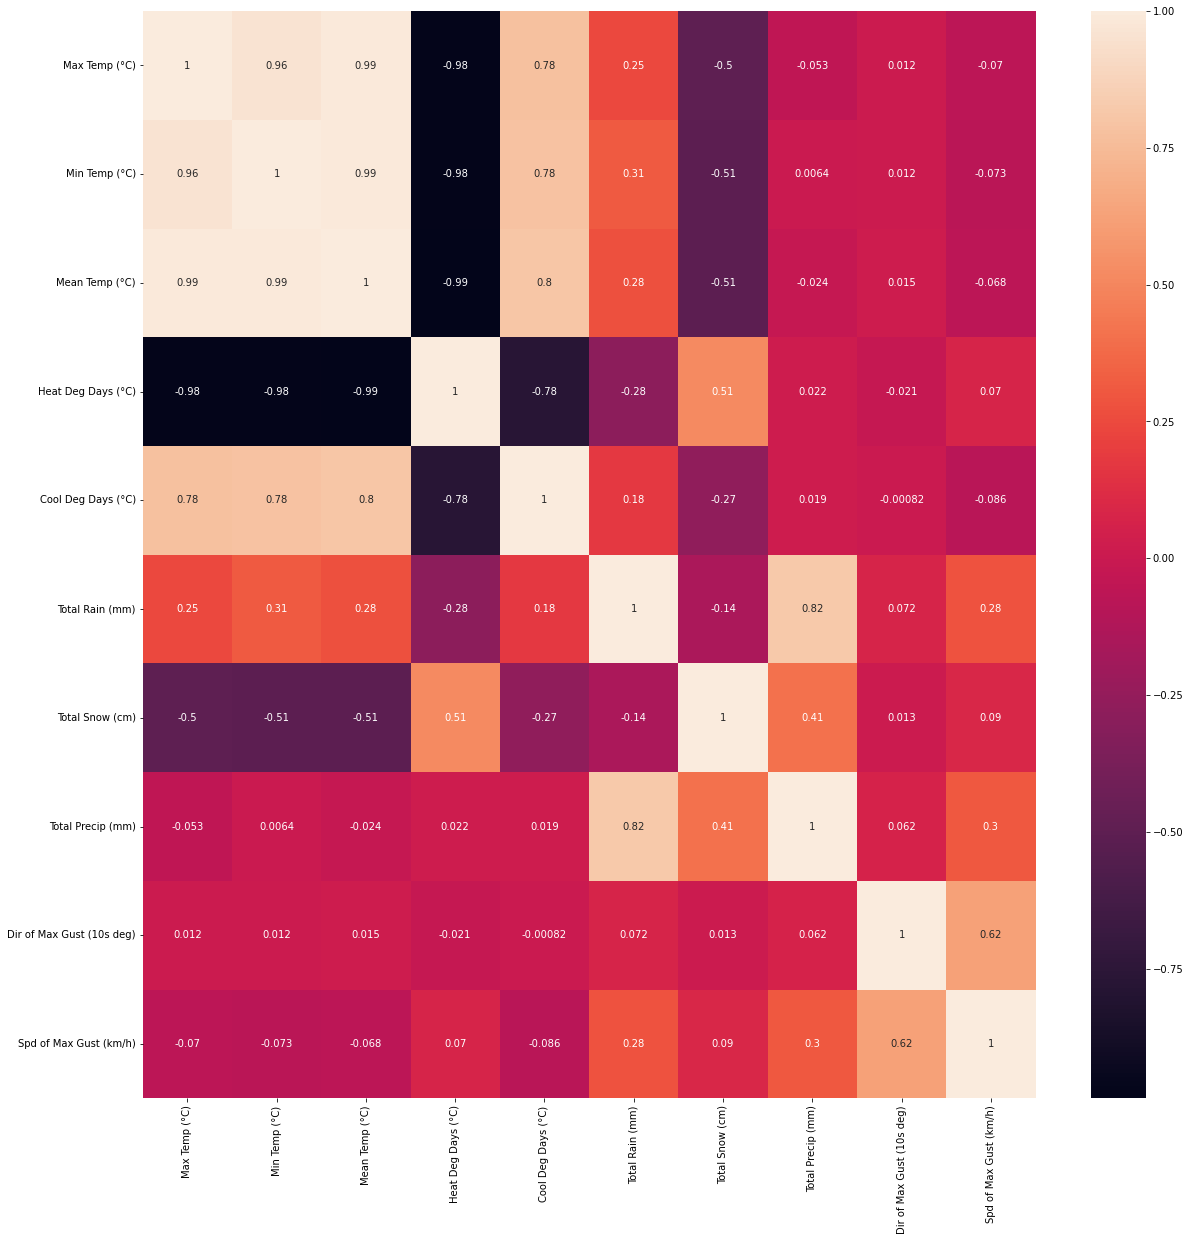

In [17]:
#To visualize the correlation between variables in a dataset
corrmat = df_new.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

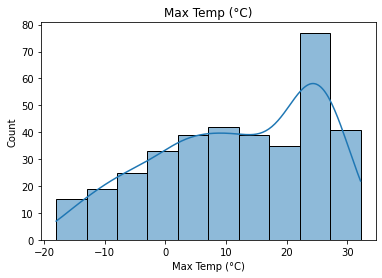

<Figure size 1080x1080 with 0 Axes>

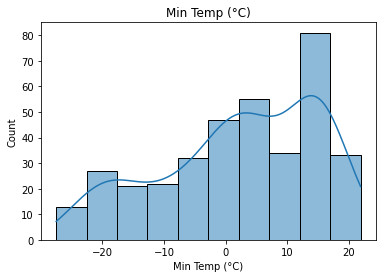

<Figure size 1080x1080 with 0 Axes>

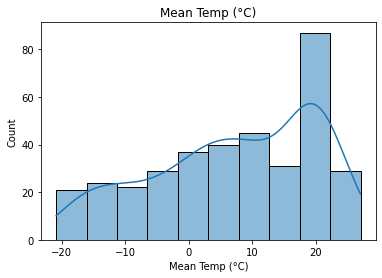

<Figure size 1080x1080 with 0 Axes>

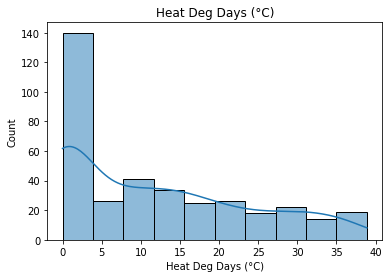

<Figure size 1080x1080 with 0 Axes>

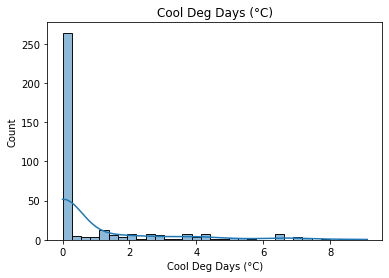

<Figure size 1080x1080 with 0 Axes>

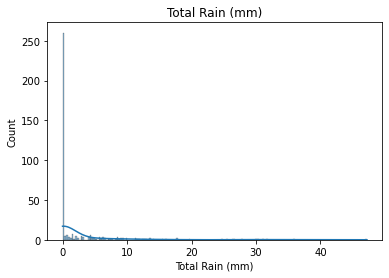

<Figure size 1080x1080 with 0 Axes>

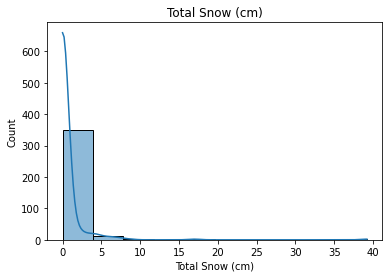

<Figure size 1080x1080 with 0 Axes>

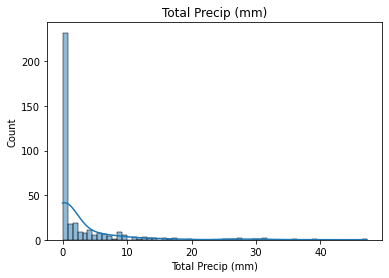

<Figure size 1080x1080 with 0 Axes>

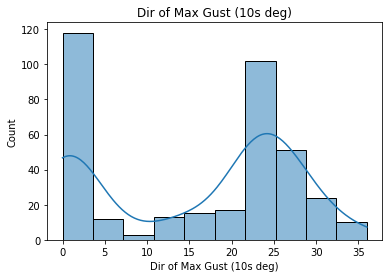

<Figure size 1080x1080 with 0 Axes>

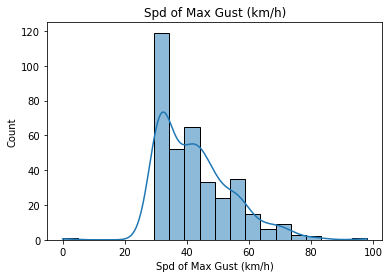

<Figure size 1080x1080 with 0 Axes>

In [18]:
for feature in numerical_feature:
    data=df_new.copy()
    sns.histplot(df_new[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Checking Outliers

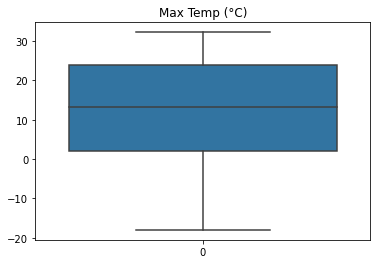

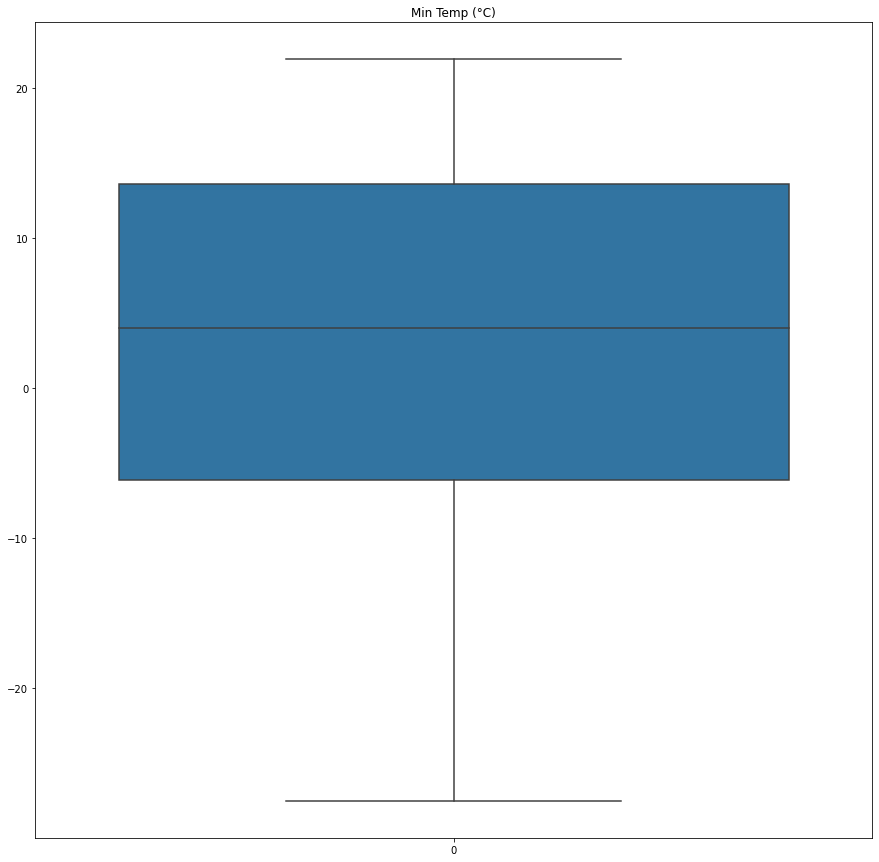

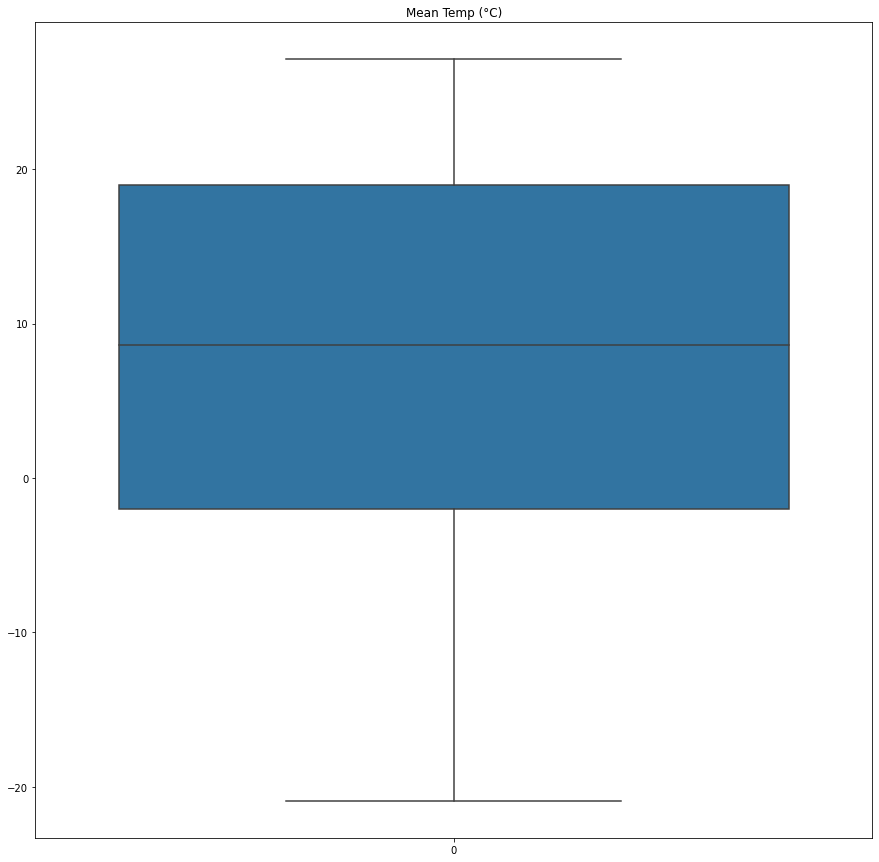

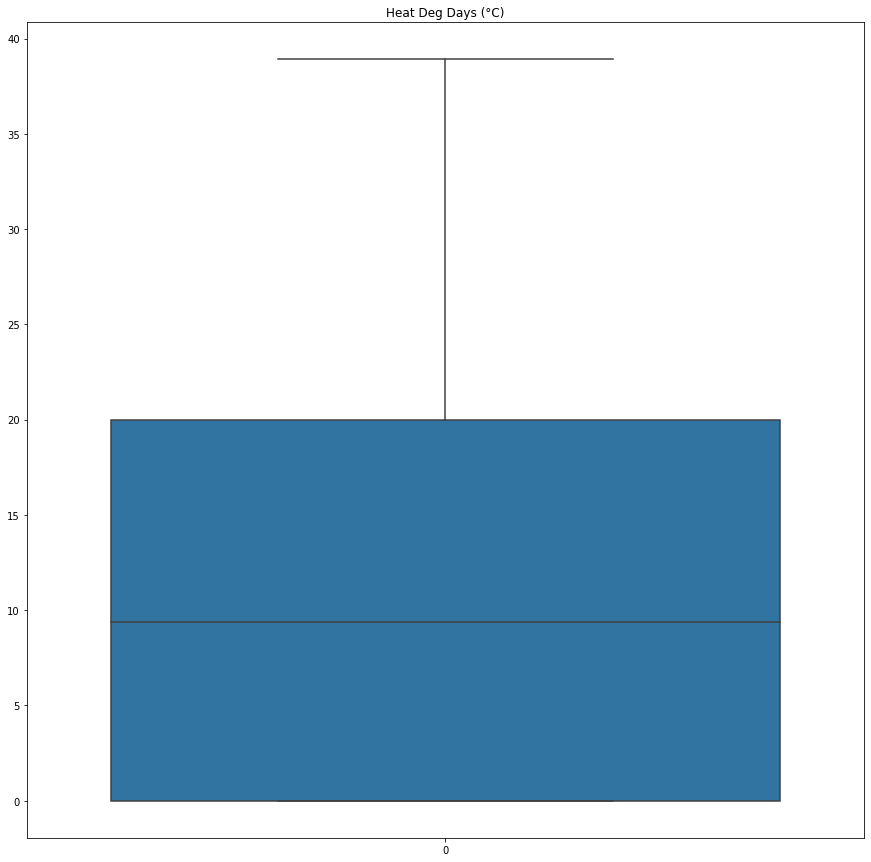

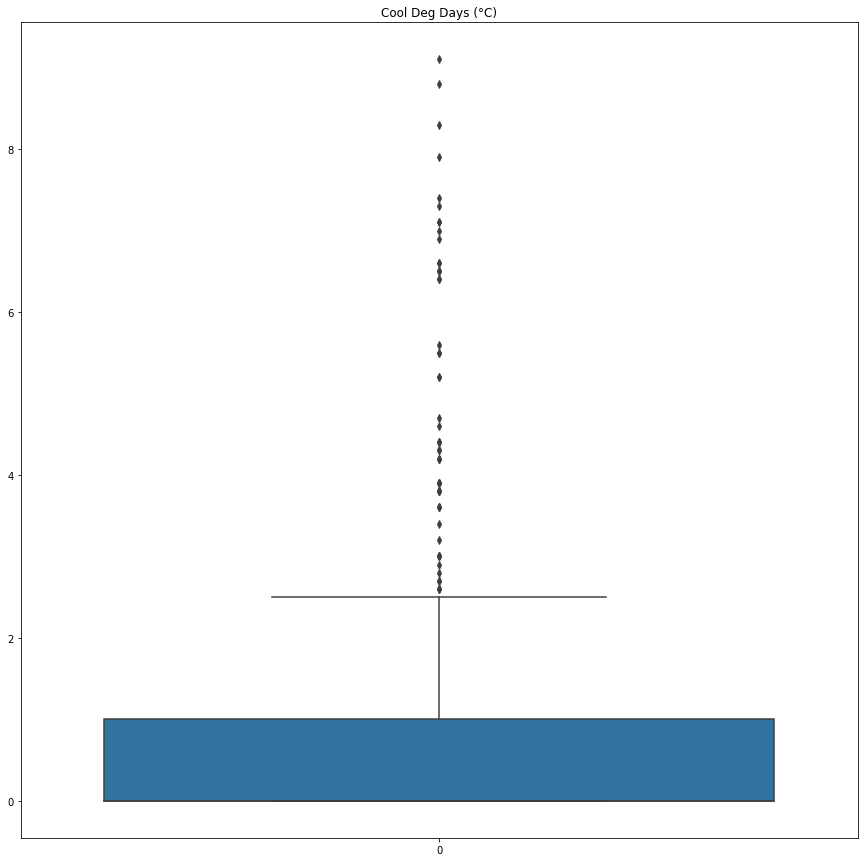

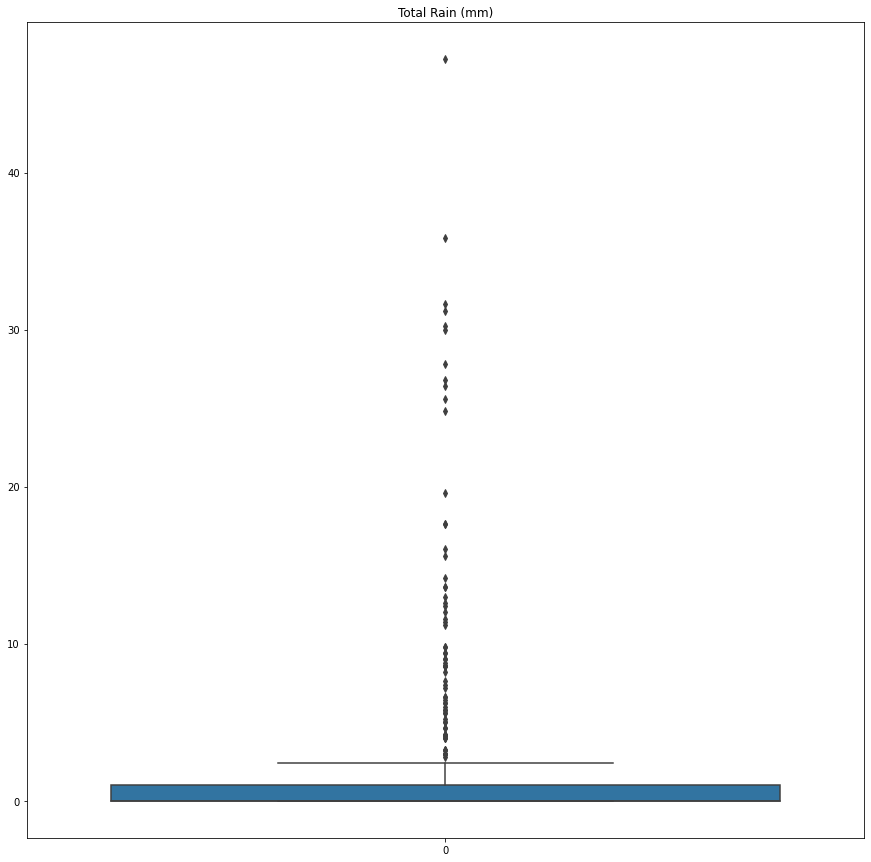

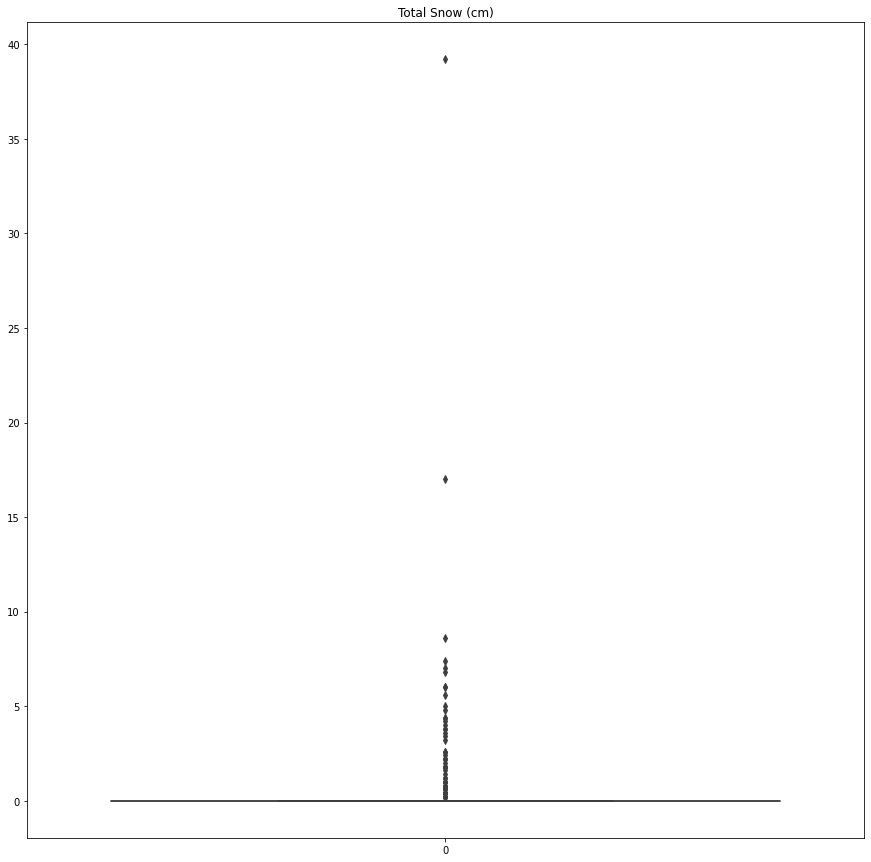

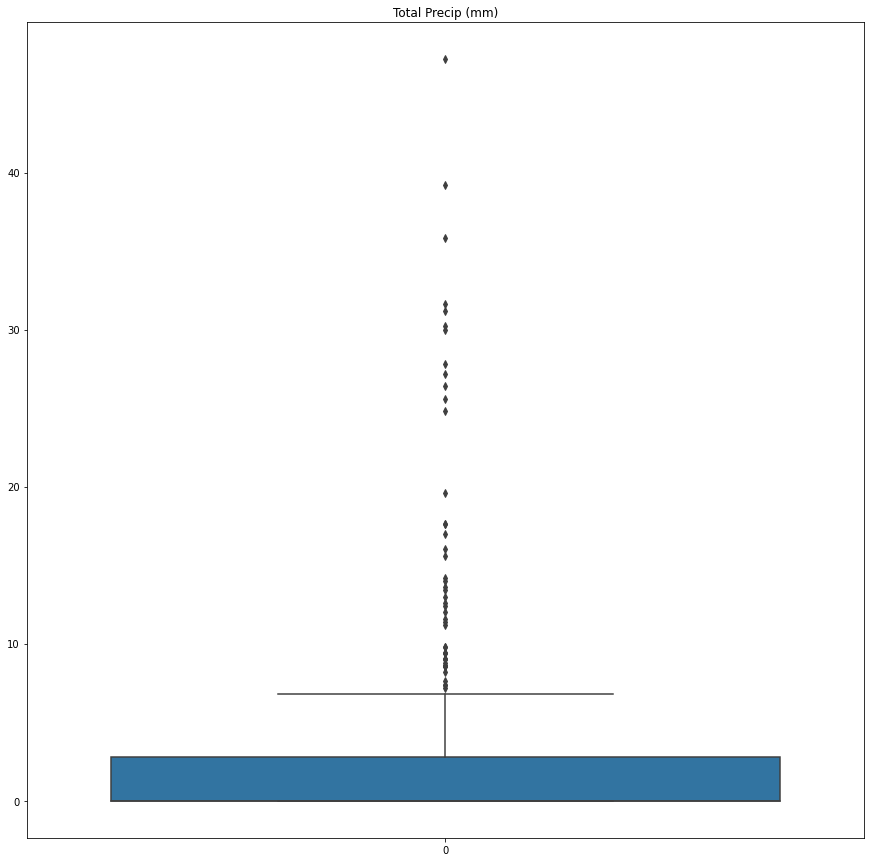

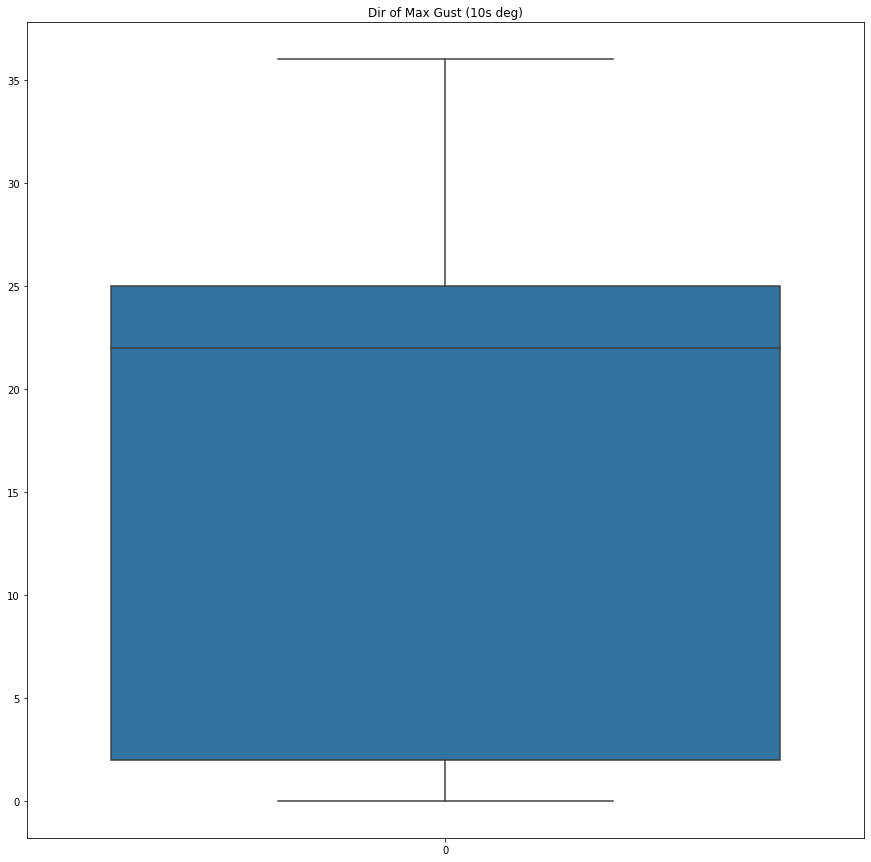

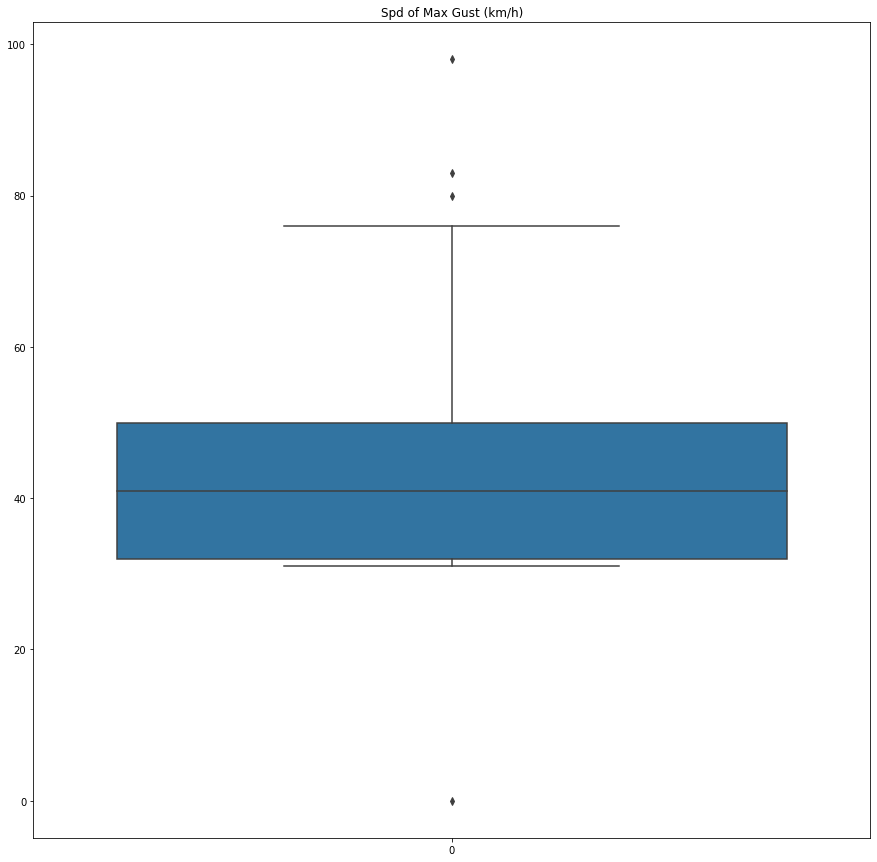

<Figure size 1080x1080 with 0 Axes>

In [19]:
#Using For Loop to plot a boxplot for all the numerical features to see the outliers
for feature in numerical_feature:
    data=df_new.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The outliers in the dataset might represent unusual rental patterns, such as exceptionally high or low rental counts on specific days.

We will not Handle the outliers

# Loading Check Point DataSet

In [20]:
df_check= df = pd.read_excel('Checkpoint_count.xlsx')
df_check.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


# Handling null values

In [21]:
df_check.isnull().sum()

Date               0
Time               0
check_point0       0
check_point1       0
check_point2       0
check_point3       0
check_point4     257
check_point5       0
check_point6       0
check_point7       0
check_point8       0
check_point9     267
check_point10      0
check_point11    110
check_point12      0
check_point13      0
check_point14      0
check_point15      0
check_point16    269
check_point17      0
check_point18      0
check_point19      0
check_point20      0
dtype: int64

In [22]:
#filling Null values with zero
df_check = df_check.fillna(0)
df_check.isnull().sum()

Date             0
Time             0
check_point0     0
check_point1     0
check_point2     0
check_point3     0
check_point4     0
check_point5     0
check_point6     0
check_point7     0
check_point8     0
check_point9     0
check_point10    0
check_point11    0
check_point12    0
check_point13    0
check_point14    0
check_point15    0
check_point16    0
check_point17    0
check_point18    0
check_point19    0
check_point20    0
dtype: int64

# Summing the total check point to create a new column names total rental

In [23]:
#Summing the number of cycle
#Sum data row-wise (horizontally)
df_check["total_rental"]= df_check.iloc[:, 2:].sum(axis=1)

In [24]:
df_check.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,total_rental
0,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,58,91,24,3,0.0,17,78,21,6,531.0
1,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,109,177,32,13,0.0,11,57,77,4,804.0
2,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,71,131,33,5,0.0,14,174,40,5,774.0
3,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,6,11,6,1,0.0,1,20,6,0,158.0
4,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,0,5,49,20,0.0,0,41,56,10,371.0


In [25]:
start_date = '2015-01-01'
end_date = '2015-12-31'

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with the date range
date_df = pd.DataFrame({'Date': date_range})

# Merge the date DataFrame with your dataset based on a common index or key
# For example, if your dataset has 5 rows, you can assign the date range to it like this:
df_check['Date/Time'] = date_df['Date'][:len(df_check)]

In [26]:
# Setting the 'Date/Time' column as the index
df_check.set_index('Date/Time', inplace=True)

In [27]:
df_check.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,total_rental
Date/Time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01 00:00:00,00:00:00,58,12,4,17,33.0,49,21,16,...,58,91,24,3,0.0,17,78,21,6,531.0
2015-01-02,2015-02-01 00:00:00,00:00:00,75,7,5,15,30.0,113,27,9,...,109,177,32,13,0.0,11,57,77,4,804.0
2015-01-03,2015-03-01 00:00:00,00:00:00,79,7,3,7,30.0,107,36,12,...,71,131,33,5,0.0,14,174,40,5,774.0
2015-01-04,2015-04-01 00:00:00,00:00:00,10,1,21,0,10.0,35,29,1,...,6,11,6,1,0.0,1,20,6,0,158.0
2015-01-05,2015-05-01 00:00:00,00:00:00,42,0,2,0,27.0,90,21,1,...,0,5,49,20,0.0,0,41,56,10,371.0


# merging rented cycle data with weather dataset

In [28]:
merged_df = df_new.merge(df_check, left_index=True, right_index=True, how='outer')
merged_df.tail()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,total_rental
Date/Time,,,,,,,,,,,,,,,,,,,,,
2015-12-27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,3.0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,30.0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,0.0,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,0.0,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,-0.4,-5.2,-2.8,20.8,0.0,0.0,0.4,0.4,26.0,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping Unwanted columns

In [29]:
# Dropping columns from index 10 to the last column
merged_df.drop(merged_df.columns[10:-1], axis=1, inplace=True)

# Print the DataFrame after dropping columns
merged_df.tail()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),total_rental
Date/Time,,,,,,,,,,,
2015-12-27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,3.0,44,NaN
2015-12-28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,30.0,44,NaN
2015-12-29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,0.0,31,NaN
2015-12-30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,0.0,31,NaN
2015-12-31,-0.4,-5.2,-2.8,20.8,0.0,0.0,0.4,0.4,26.0,39,NaN


# Filling Null values with mean in total_rental

In [30]:
# Calculating the mean of the column
column_median = merged_df['total_rental'].median()

# Filling NaN values in total_rental with the mean
merged_df['total_rental'].fillna(column_median, inplace=True)


In [32]:
merged_df.tail()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),total_rental
Date/Time,,,,,,,,,,,
2015-12-27,1.9,-4.1,-1.1,19.1,0.0,4.2,2.6,13.4,3.0,44,34529.0
2015-12-28,-4.1,-10.9,-7.5,25.5,0.0,0.0,0.0,0.0,30.0,44,34529.0
2015-12-29,-7.5,-12.1,-9.8,27.8,0.0,0.0,39.2,39.2,0.0,31,34529.0
2015-12-30,-5.1,-9.2,-7.2,25.2,0.0,0.2,5.6,3.4,0.0,31,34529.0
2015-12-31,-0.4,-5.2,-2.8,20.8,0.0,0.0,0.4,0.4,26.0,39,34529.0


For the independent features, we can create scatter plots that show the intersection of feature and label values. We can also calculate the correlation statistic to quantify the apparent relationship.

In [42]:
independent_features = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)']

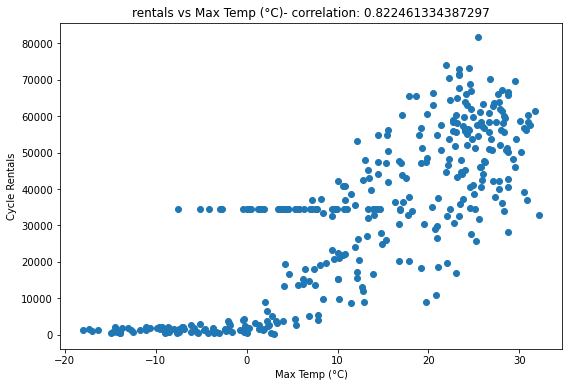

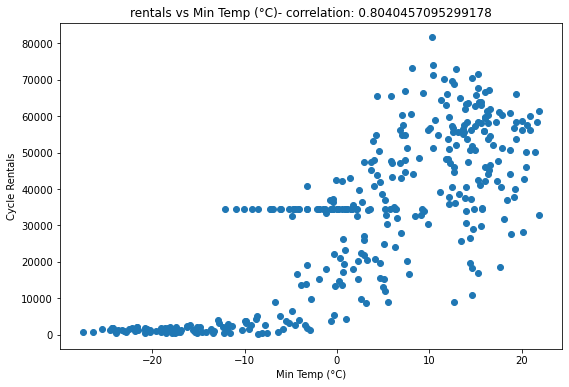

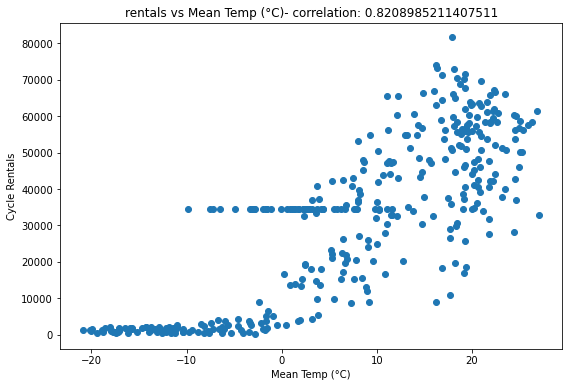

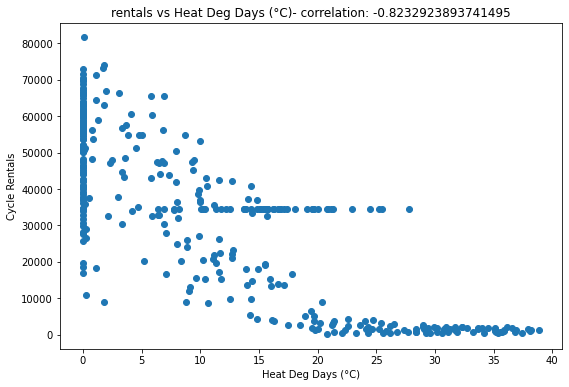

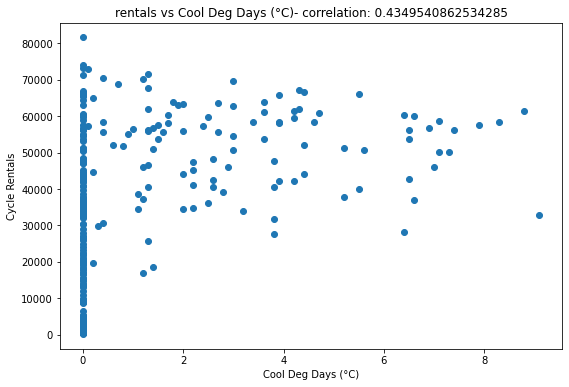

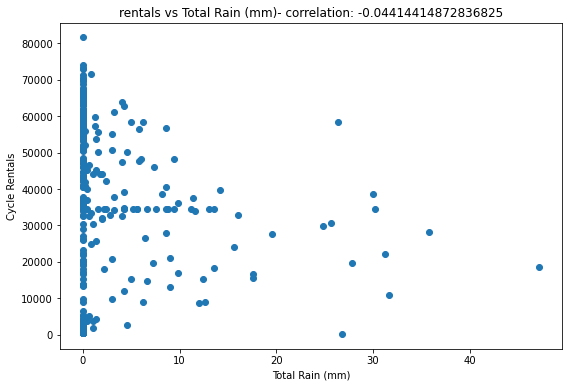

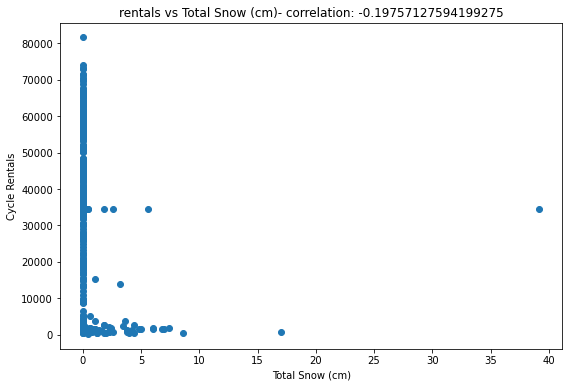

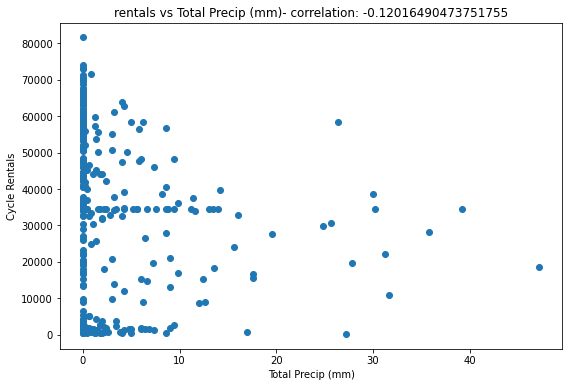

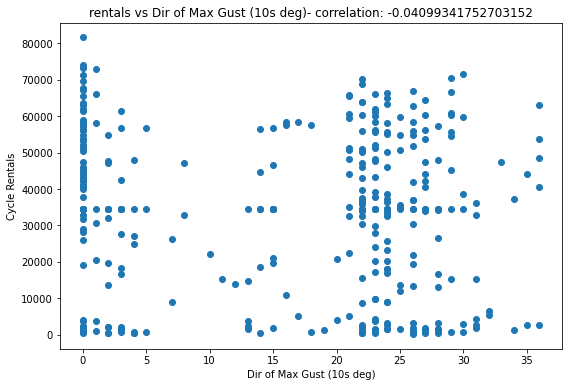

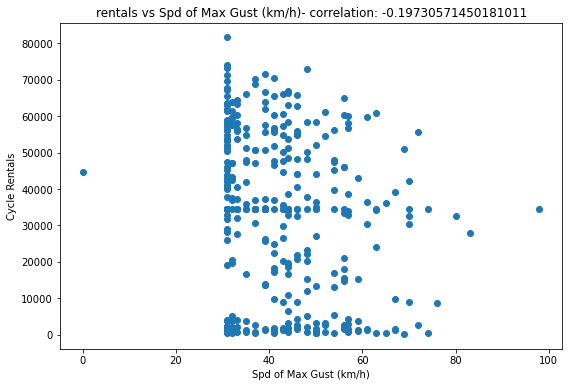

In [43]:
for col in independent_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca() # To get current axes
    feature = merged_df[col]
    label = merged_df['total_rental']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Cycle Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

<AxesSubplot:xlabel='Date/Time'>

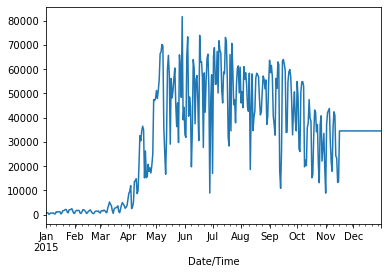

In [45]:
#Cyclic plot of total rental
temp = merged_df['total_rental']
temp.plot()

# Split the data into training and testing sets

In [46]:
X= merged_df.iloc[:,:-1]
y= merged_df['total_rental']

In [48]:
train_size = int(0.75 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and compile the LSTM model


In [55]:
model = Sequential()
model.add(LSTM(50, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [56]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
9/9 [==============================] - 5s 14ms/step - loss: 1598600576.0000
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 1598552320.0000
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 1598492672.0000
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 1598430080.0000
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1598376576.0000
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 1598316672.0000
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 1598236672.0000
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 1598161280.0000
Epoch 9/100
9/9 [==============================] - 0s 13ms/step - loss: 1598098304.0000
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 1598050816.0000
Epoch 11/100
9/9 [==============================] - 0s 11ms/step - loss: 1598009856.0000
Epoch 12/100
9/9 [===============

9/9 [==============================] - 0s 10ms/step - loss: 1595619328.0000
Epoch 94/100
9/9 [==============================] - 0s 10ms/step - loss: 1595592448.0000
Epoch 95/100
9/9 [==============================] - 0s 9ms/step - loss: 1595564416.0000
Epoch 96/100
9/9 [==============================] - 0s 8ms/step - loss: 1595536896.0000
Epoch 97/100
9/9 [==============================] - 0s 9ms/step - loss: 1595509632.0000
Epoch 98/100
9/9 [==============================] - 0s 10ms/step - loss: 1595483136.0000
Epoch 99/100
9/9 [==============================] - 0s 8ms/step - loss: 1595453696.0000
Epoch 100/100
9/9 [==============================] - 0s 9ms/step - loss: 1595422464.0000


# Evaluate the model

In [57]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}, Testing Loss: {test_loss}')

Training Loss: 1595403520.0, Testing Loss: 1207163008.0


# Make predictions

In [58]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

3/3 [==============================] - 0s 6ms/step


In [61]:
# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for training and testing data
train_mape = mean_absolute_percentage_error(merged_df['total_rental'][:len(train_preds)], train_preds)
test_mape = mean_absolute_percentage_error(merged_df['total_rental'][len(train_preds) + 10:], test_preds)

# #Printing error metrics

In [66]:
print(f'Training MAPE: {train_mape:.2f}%')
print(f'Testing MAPE: {test_mape:.2f}%')

Training MAPE: 98.23%
Testing MAPE: 99.82%
